# NB to Explore the data in the damage Database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib
%matplotlib inline

# Import data

### Skin Damage n=1 import

In [2]:
skin1_fp = os.path.join(os.getcwd(), '..', 'DataBase', 'DB_skin_damage_n1.csv')
skin1_df = pd.read_csv(skin1_fp, index_col=0).dropna()
skin1_df['Type'] = 'Skin1'
skin1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Columns: 193 entries, pos_x [m] to Type
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


### Skin Damage n=4 import

In [4]:
skin4_fp = os.path.join(os.getcwd(), '..', 'DataBase', 'DB_skin_damage_n4.csv')
skin4_df = pd.read_csv(skin4_fp, index_col=0).dropna()
skin4_df['Type'] = 'Skin4'
skin4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 9 to 1000
Columns: 193 entries, pos_x [m] to Type
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


### Core Damage import

In [6]:
core_fp = os.path.join(os.getcwd(), '..', 'DataBase', 'DB_core_damage.csv')
core_df = pd.read_csv(core_fp, index_col=0).dropna()
core_df['Type'] = 'Core'
core_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 1 to 1000
Columns: 194 entries, pos_x [m] to Type
dtypes: float64(193), object(1)
memory usage: 1.2+ MB


In [148]:
# Join all DataFrames into one
damageDF = pd.concat([skin4_df, skin1_df, core_df], sort=False, ignore_index=True)
damageDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Columns: 196 entries, pos_x [m] to theta_y [°]
dtypes: float64(195), object(1)
memory usage: 4.2+ MB


## Visualizing the natural frequency distribution

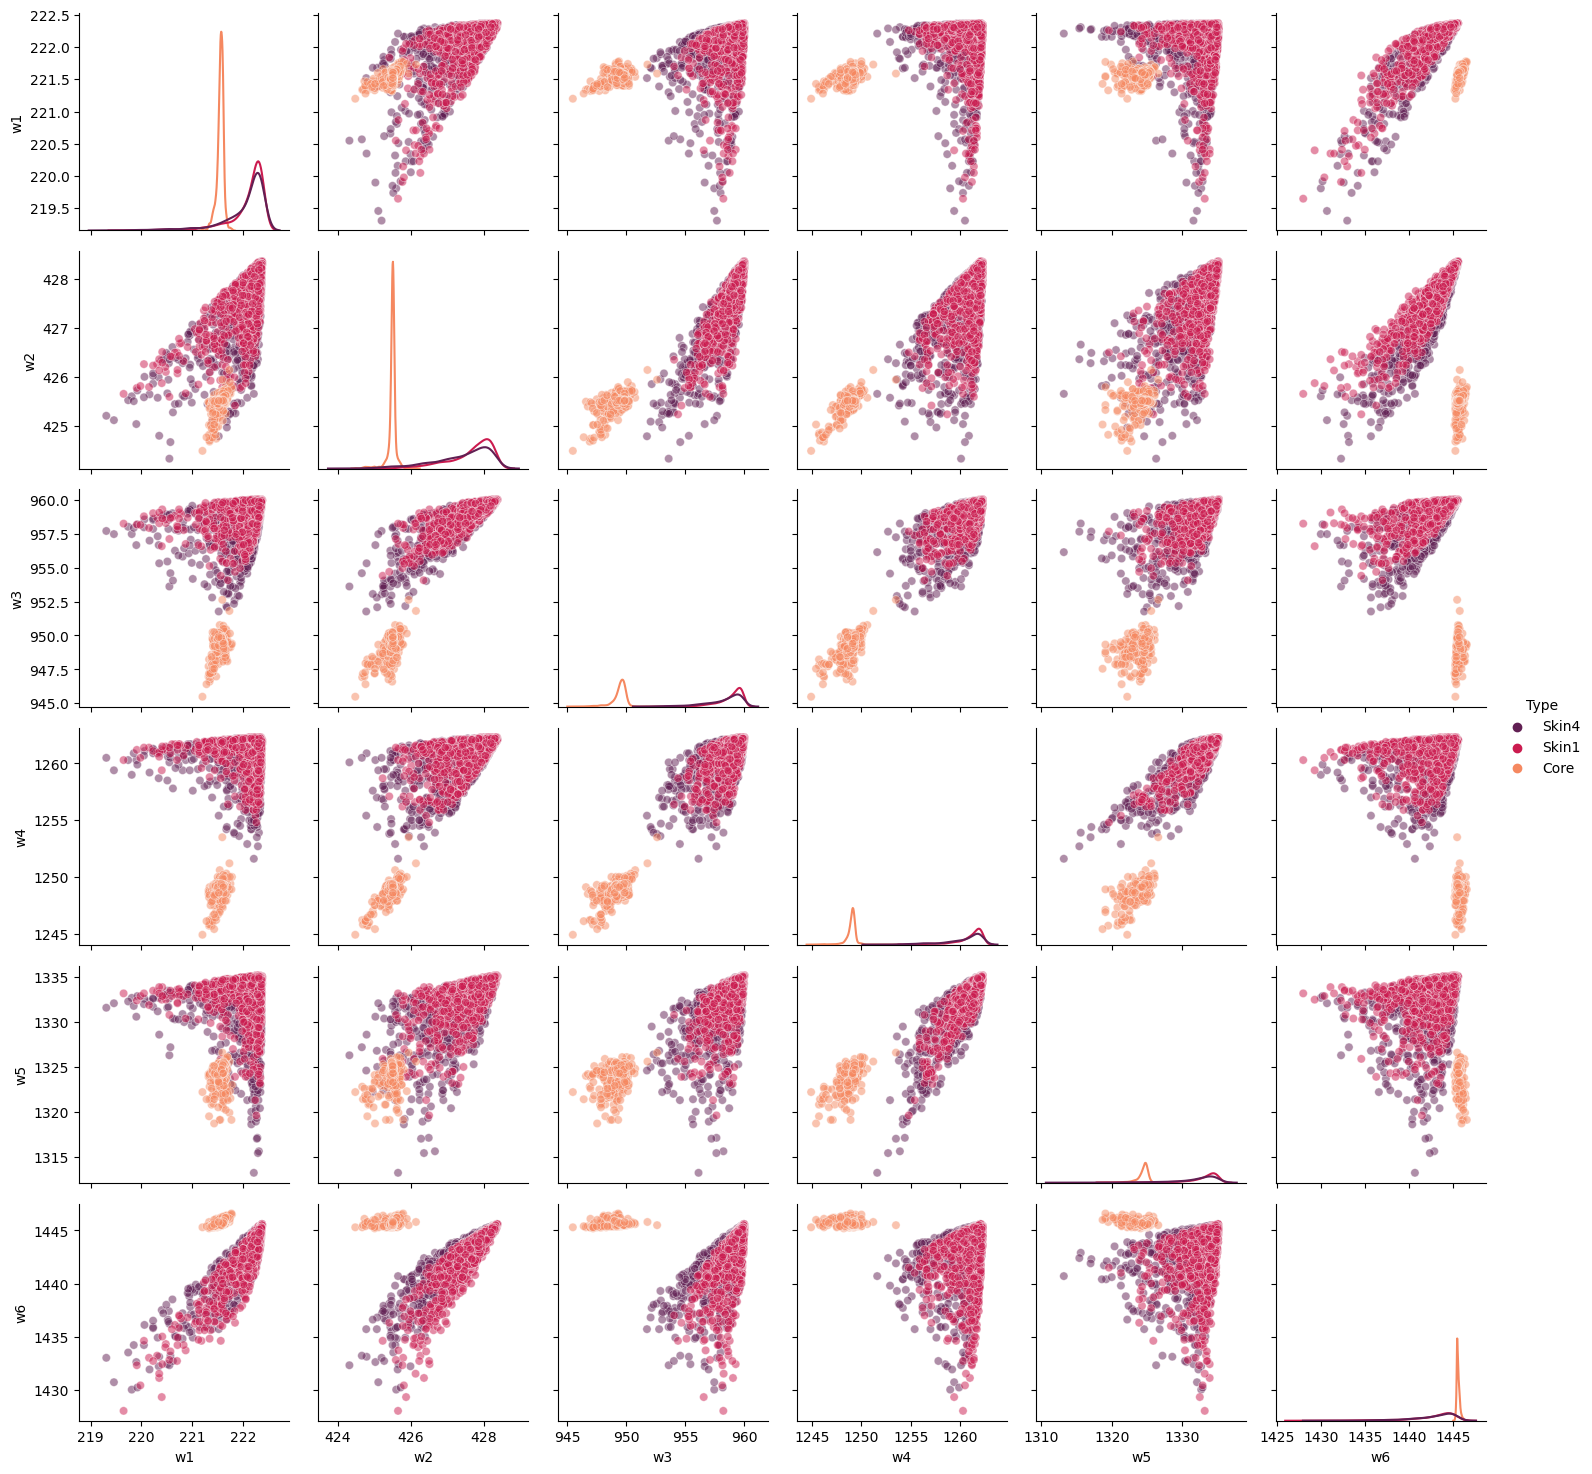

In [146]:
naturalFreqPG = sns.PairGrid(damageDF, vars=['w1','w2','w3','w4','w5','w6'], hue='Type', palette='rocket')
naturalFreqPG.map_diag(sns.kdeplot)
naturalFreqPG.map_offdiag(sns.scatterplot, alpha=0.5)
naturalFreqPG.add_legend()

## Nothing good from now on

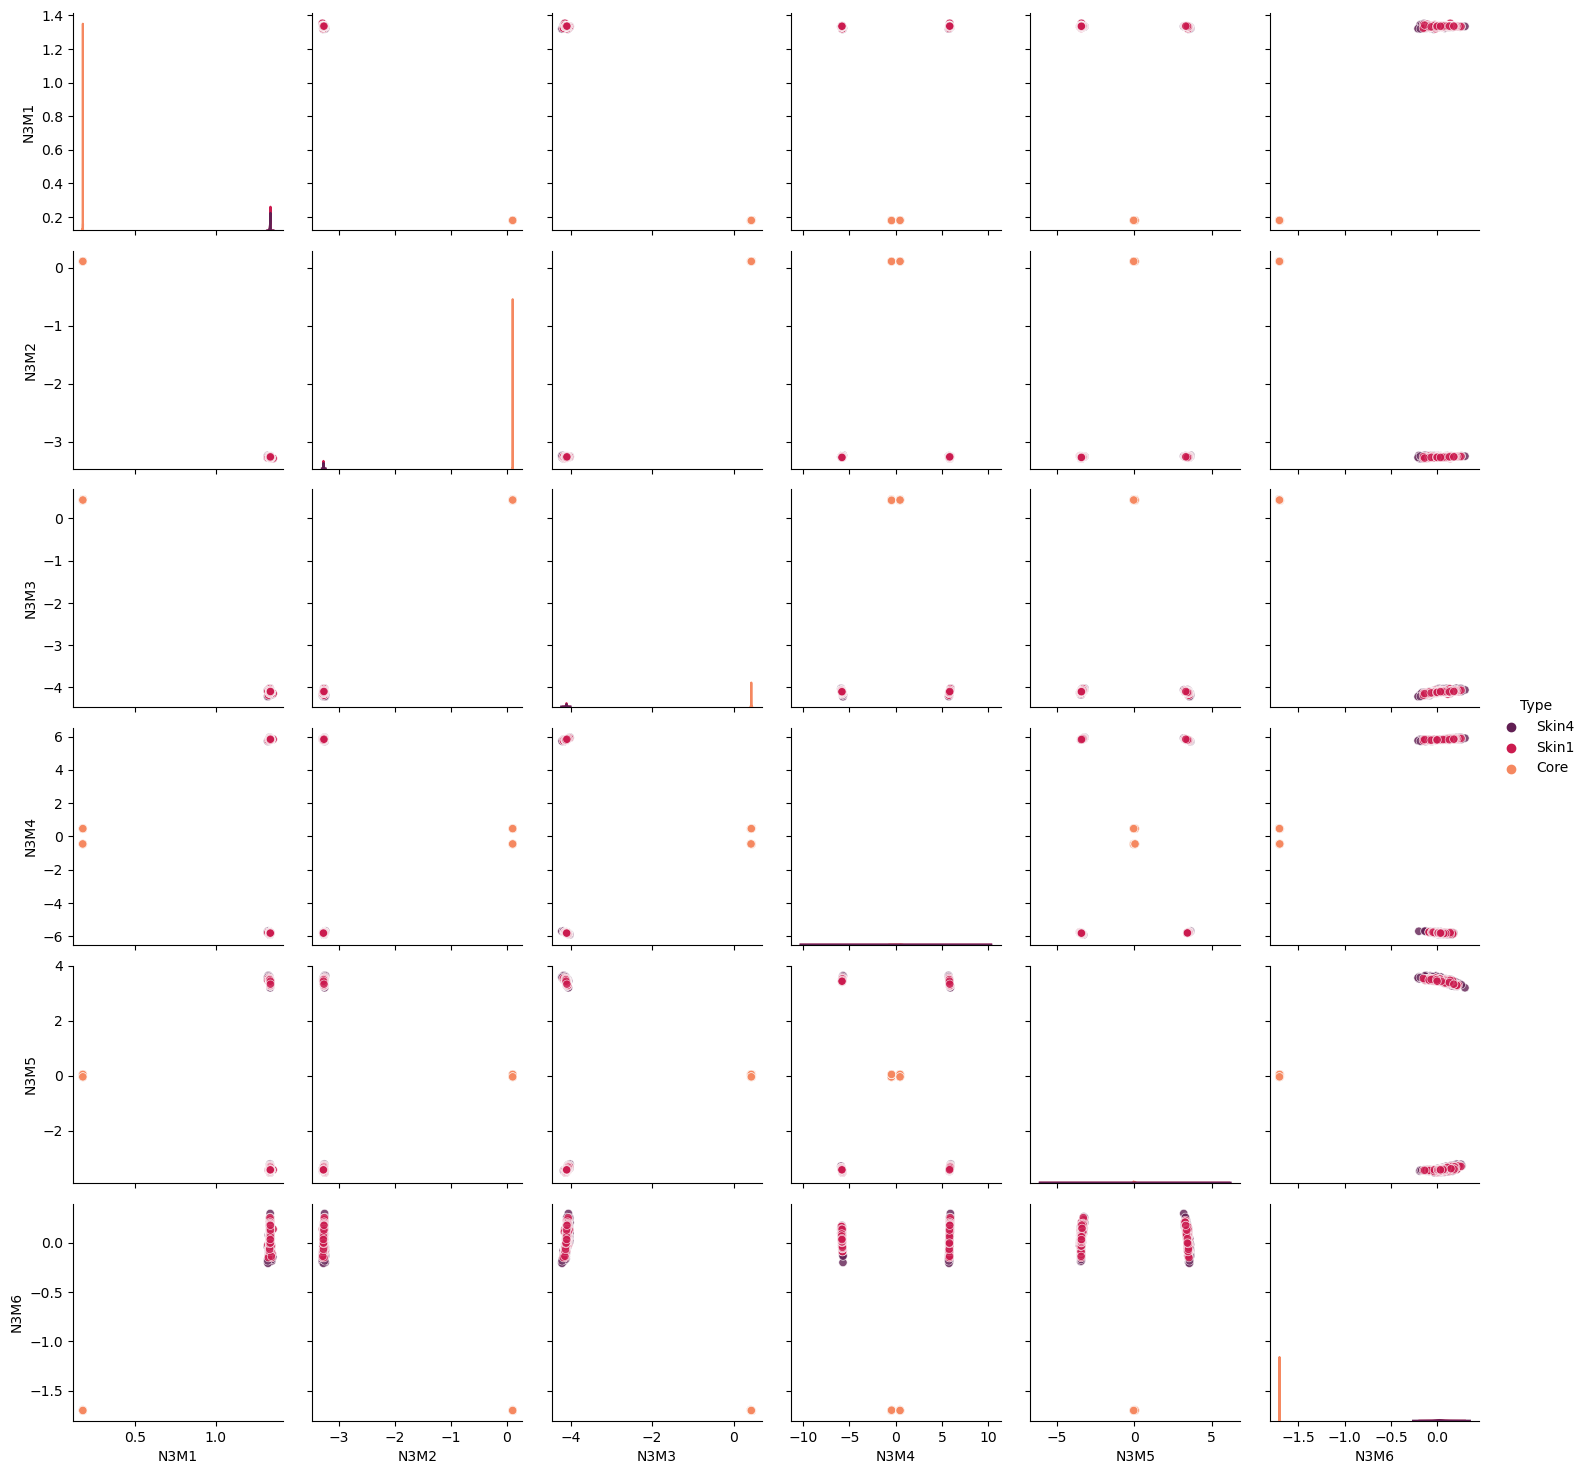

In [35]:
pg = sns.PairGrid(damageDF, vars=['N3M1','N3M2','N3M3','N3M4','N3M5','N3M6'], hue='Type', palette='rocket')
pg.map_diag(sns.kdeplot)
pg.map_offdiag(sns.scatterplot, alpha=0.8)
pg.add_legend()

In [69]:
a = damageDF[['N3M1', 'N3M2', 'N3M3', 'N3M4', 'N3M5', 'N3M6']]
a = damageDF[['N3M1', 'Type']]

In [145]:
m1 = pd.DataFrame(columns=['UZ', 'Type', 'Mode'])
m2 = pd.DataFrame(columns=['UZ', 'Type', 'Mode'])
m3 = pd.DataFrame(columns=['UZ', 'Type', 'Mode'])
m4 = pd.DataFrame(columns=['UZ', 'Type', 'Mode'])
m5 = pd.DataFrame(columns=['UZ', 'Type', 'Mode'])
m6 = pd.DataFrame(columns=['UZ', 'Type', 'Mode'])

node = 3

m1['UZ'], m1['Type'], m1['Mode'] = damageDF[f'N{node}M1'], damageDF['Type'], 'M1'
m2['UZ'], m2['Type'], m2['Mode'] = damageDF[f'N{node}M2'], damageDF['Type'], 'M2'
m3['UZ'], m3['Type'], m3['Mode'] = damageDF[f'N{node}M3'], damageDF['Type'], 'M3'
m4['UZ'], m4['Type'], m4['Mode'] = damageDF[f'N{node}M4'], damageDF['Type'], 'M4'
m5['UZ'], m5['Type'], m5['Mode'] = damageDF[f'N{node}M5'], damageDF['Type'], 'M5'
m6['UZ'], m6['Type'], m6['Mode'] = damageDF[f'N{node}M6'], damageDF['Type'], 'M6'

1
2
3
4
5
6


In [117]:
nodeUZ = pd.concat([m1, m2, m3, m4, m5, m6])
nodeUZ

,UZ,Type,Mode
0,1.336540,Skin4,M1
1,1.334790,Skin4,M1
2,1.335372,Skin4,M1
3,1.335461,Skin4,M1
4,1.336611,Skin4,M1
...,...,...,...
2814,-1.699344,Core,M6
2815,-1.700127,Core,M6
2816,-1.702060,Core,M6
2817,-1.702133,Core,M6
